# Quantization

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

plt.style.use('seaborn-v0_8-whitegrid')

| **Bit Depth** | **Number of Possible Values** | **Smallest Quantization Step** |
| -------------- | ------------------------------ | ----------------------------- |
| 8-bit          | 256                            | 1/127                         |
| 12-bit         | 4,096                          | 1/2047                        |
| 16-bit         | 65,536                         | 1/32767                       |
| 20-bit         | 1,048,576                      | 1/524287                      |
| 24-bit         | 16,777,216                     | 1/8388607                     |
| 32-bit         | 4,294,967,296                  | 1/2147483647                  |


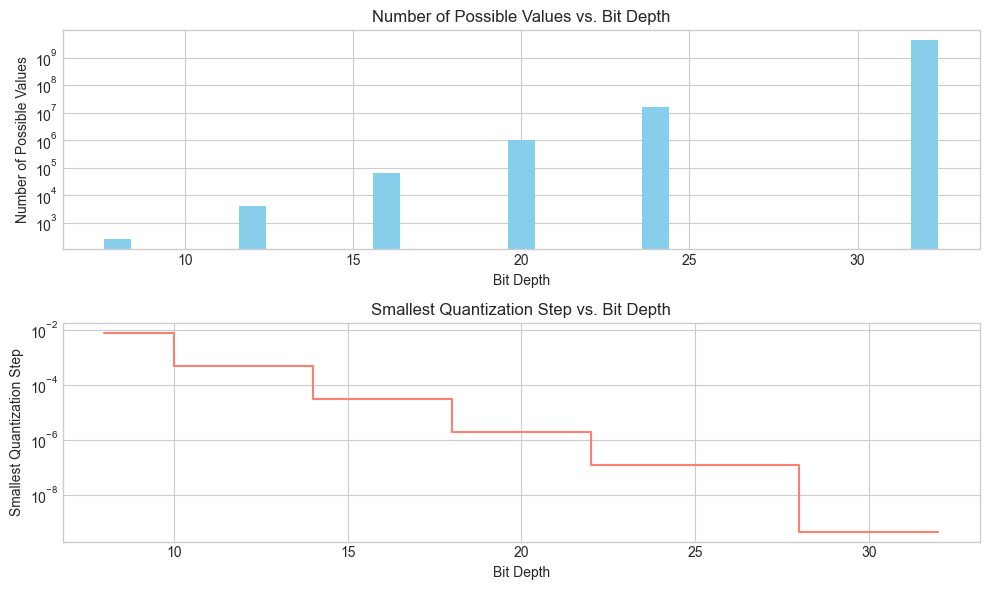

In [4]:
# Data
bit_depths = [8, 12, 16, 20, 24, 32]
num_possible_values = [256, 4096, 65536, 1048576, 16777216, 4294967296]
smallest_quantization_step = [1/127, 1/2047, 1/32767, 1/524287, 1/8388607, 1/2147483647]

# Plotting quantization levels
plt.figure(figsize=(10, 6))

# Bar plot for the number of possible values
plt.subplot(2, 1, 1)
plt.bar(bit_depths, num_possible_values, color='skyblue')
plt.yscale('log')  # Use a logarithmic scale for better visualization
plt.xlabel('Bit Depth')
plt.ylabel('Number of Possible Values')
plt.title('Number of Possible Values vs. Bit Depth')

# Step plot for the smallest quantization step
plt.subplot(2, 1, 2)
plt.step(bit_depths, smallest_quantization_step, where='mid', color='salmon')
plt.yscale('log')  # Use a logarithmic scale for better visualization
plt.xlabel('Bit Depth')
plt.ylabel('Smallest Quantization Step')
plt.title('Smallest Quantization Step vs. Bit Depth')

plt.tight_layout()
plt.show()

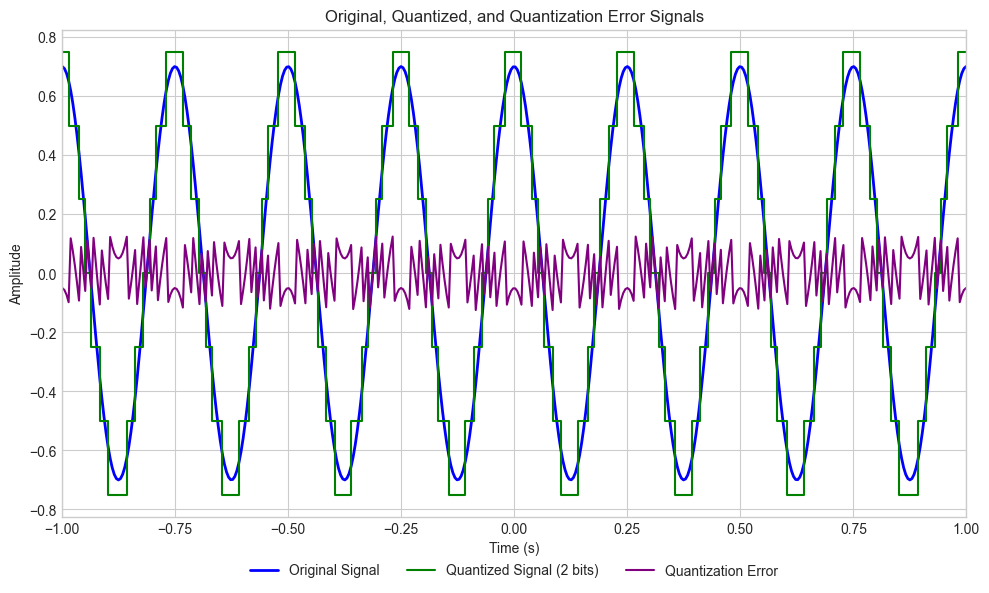

In [5]:
# Sampling parameters
fs = 48000    # Sampling rate
pt = 480      # Number of points in time domain
T = 1 / fs    # Sampling period

# Define a time vector for the discrete samples
t = np.linspace(-1.1, 1.1, pt)

# Define a signal with amplitude, frequency, phase
A = 0.7       # Amplitude
f0 = 4        # Frequency
phi = 0       # Phase

x_f0 = A * np.cos(2 * np.pi * f0 * t + phi)

# Quantization
n_bits = 2
quantization_step = 1 / 2 ** n_bits
quantized_signal = np.round(x_f0 / quantization_step) * quantization_step

# Quantization error
quantization_error = x_f0 - quantized_signal

# Plotting
plt.figure(figsize=(10, 6))

plt.plot(t, x_f0, 'b', lw=2, label='Original Signal')
plt.step(t, quantized_signal, 'g-', label=f'Quantized Signal ({n_bits} bits)')
plt.plot(t, quantization_error, 'purple', label='Quantization Error')
plt.xlim(-1., 1.)  # Adjusted limits for better visualization
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Original, Quantized, and Quantization Error Signals')

# Place the legend below the plot
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.15), ncol=3)

plt.grid(True)
plt.tight_layout()
plt.show()


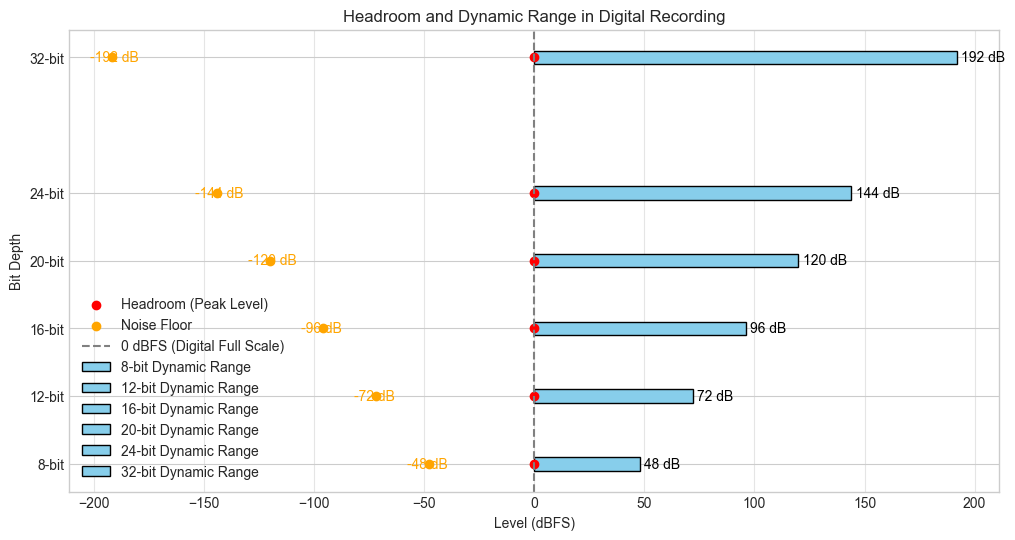

In [6]:


# Define bit depths and their dynamic ranges
dynamic_ranges = [6 * b for b in bit_depths]  # Dynamic range in dB (6 dB per bit)

# Define headroom and noise floor relative to peak level (0 dBFS)
headroom = 0  # Reference point for peak level
noise_floors = [-dr for dr in dynamic_ranges]  # Noise floor relative to dynamic range

# Plot
plt.figure(figsize=(12, 6))
for i, b in enumerate(bit_depths):
    plt.barh(b, dynamic_ranges[i], color="skyblue", edgecolor="black", label=f"{b}-bit Dynamic Range")
    plt.scatter([headroom], [b], color="red", label="Headroom (Peak Level)" if i == 0 else None)
    plt.scatter([noise_floors[i]], [b], color="orange", label="Noise Floor" if i == 0 else None)

# Add annotations and labels
for i, b in enumerate(bit_depths):
    plt.text(dynamic_ranges[i] + 2, b, f"{dynamic_ranges[i]} dB", va="center", color="black")
    plt.text(noise_floors[i] - 10, b, f"{noise_floors[i]} dB", va="center", color="orange")

plt.axvline(0, color="gray", linestyle="--", label="0 dBFS (Digital Full Scale)")
plt.title("Headroom and Dynamic Range in Digital Recording")
plt.xlabel("Level (dBFS)")
plt.ylabel("Bit Depth")
plt.yticks(bit_depths, [f"{b}-bit" for b in bit_depths])
plt.legend()
plt.grid(axis="x", alpha=0.5)
plt.show()


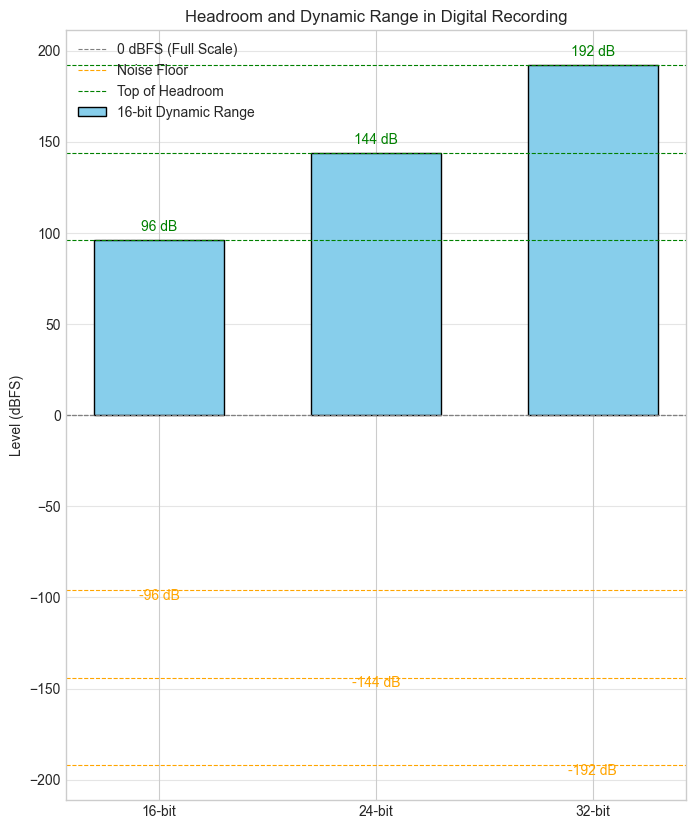

In [8]:
# Plot dynamic range with vertical bars
plt.figure(figsize=(8, 10))

# Iterate over bit depths and plot dynamic ranges
for i, b in enumerate(bit_depths):
    # Plot the dynamic range as a vertical bar
    plt.bar(i, dynamic_ranges[i], color="skyblue", edgecolor="black", width=0.6, label=f"{b}-bit Dynamic Range" if i == 0 else None)
    
    # Add dashed lines for noise floor, 0 dBFS, and top of headroom
    plt.axhline(0, color="gray", linestyle="--", linewidth=0.8, label="0 dBFS (Full Scale)" if i == 0 else None)
    plt.axhline(noise_floors[i], color="orange", linestyle="--", linewidth=0.8, label="Noise Floor" if i == 0 else None)
    plt.axhline(dynamic_ranges[i], color="green", linestyle="--", linewidth=0.8, label="Top of Headroom" if i == 0 else None)
    
    # Annotate the noise floor and dynamic range
    plt.text(i, noise_floors[i] - 5, f"{noise_floors[i]} dB", ha="center", color="orange")
    plt.text(i, dynamic_ranges[i] + 5, f"{dynamic_ranges[i]} dB", ha="center", color="green")

# Add labels, title, and legend
plt.xticks(range(len(bit_depths)), [f"{b}-bit" for b in bit_depths])
plt.ylabel("Level (dBFS)")
plt.title("Headroom and Dynamic Range in Digital Recording")
plt.legend(loc="upper left")
plt.grid(axis="y", alpha=0.5)

# Show the plot
plt.show()

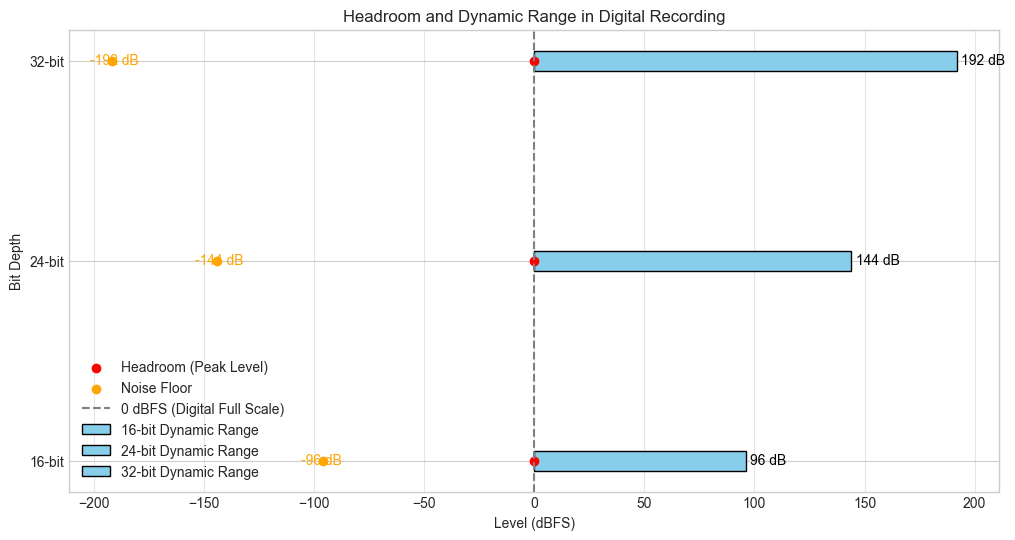

In [7]:
# Define bit depths and their dynamic ranges
bit_depths = [16, 24, 32]
dynamic_ranges = [6 * b for b in bit_depths]  # Dynamic range in dB (6 dB per bit)

# Define headroom and noise floor relative to peak level (0 dBFS)
headroom = 0  # Reference point for peak level
noise_floors = [-dr for dr in dynamic_ranges]  # Noise floor relative to dynamic range

# Plot
plt.figure(figsize=(12, 6))
for i, b in enumerate(bit_depths):
    plt.barh(b, dynamic_ranges[i], color="skyblue", edgecolor="black", label=f"{b}-bit Dynamic Range")
    plt.scatter([headroom], [b], color="red", label="Headroom (Peak Level)" if i == 0 else None)
    plt.scatter([noise_floors[i]], [b], color="orange", label="Noise Floor" if i == 0 else None)

# Add annotations and labels
for i, b in enumerate(bit_depths):
    plt.text(dynamic_ranges[i] + 2, b, f"{dynamic_ranges[i]} dB", va="center", color="black")
    plt.text(noise_floors[i] - 10, b, f"{noise_floors[i]} dB", va="center", color="orange")

plt.axvline(0, color="gray", linestyle="--", label="0 dBFS (Digital Full Scale)")
plt.title("Headroom and Dynamic Range in Digital Recording")
plt.xlabel("Level (dBFS)")
plt.ylabel("Bit Depth")
plt.yticks(bit_depths, [f"{b}-bit" for b in bit_depths])
plt.legend()
plt.grid(axis="x", alpha=0.5)
plt.show()


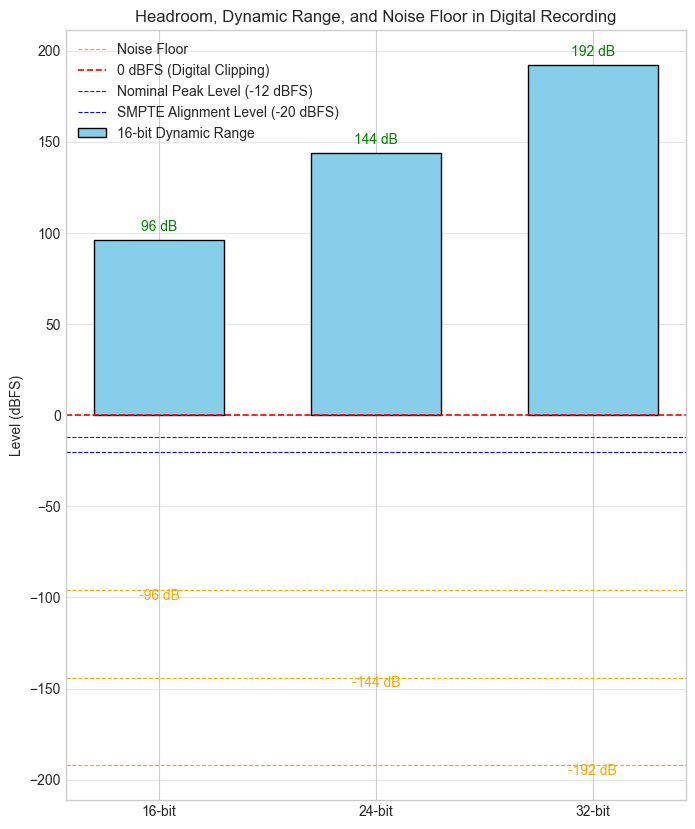

In [9]:
# Define parameters for a clearer headroom and dynamic range plot
bit_depths = [16, 24, 32]
dynamic_ranges = [6 * b for b in bit_depths]  # Dynamic range in dB (6 dB per bit)
noise_floors = [-dr for dr in dynamic_ranges]  # Noise floor at each bit depth

# Define levels for nominal peak and SMPTE alignment
nominal_peak_level = -12  # dBFS
alignment_level = -20  # dBFS

# Create the plot
plt.figure(figsize=(8, 10))

for i, b in enumerate(bit_depths):
    # Dynamic range as a vertical bar
    plt.bar(i, dynamic_ranges[i], color="skyblue", edgecolor="black", width=0.6, label=f"{b}-bit Dynamic Range" if i == 0 else None)

    # Noise floor line
    plt.axhline(noise_floors[i], color="orange", linestyle="--", linewidth=0.8, label="Noise Floor" if i == 0 else None)

    # Annotate dynamic range and noise floor
    plt.text(i, dynamic_ranges[i] + 5, f"{dynamic_ranges[i]} dB", ha="center", color="green")
    plt.text(i, noise_floors[i] - 5, f"{noise_floors[i]} dB", ha="center", color="orange")

# Add key horizontal lines for reference
plt.axhline(0, color="red", linestyle="--", linewidth=1.2, label="0 dBFS (Digital Clipping)")
plt.axhline(nominal_peak_level, color="purple", linestyle="--", linewidth=0.8, label="Nominal Peak Level (-12 dBFS)")
plt.axhline(alignment_level, color="blue", linestyle="--", linewidth=0.8, label="SMPTE Alignment Level (-20 dBFS)")

# Label axes and title
plt.xticks(range(len(bit_depths)), [f"{b}-bit" for b in bit_depths])
plt.ylabel("Level (dBFS)")
plt.title("Headroom, Dynamic Range, and Noise Floor in Digital Recording")
plt.legend(loc="upper left")
plt.grid(axis="y", alpha=0.5)

# Show the plot
plt.show()


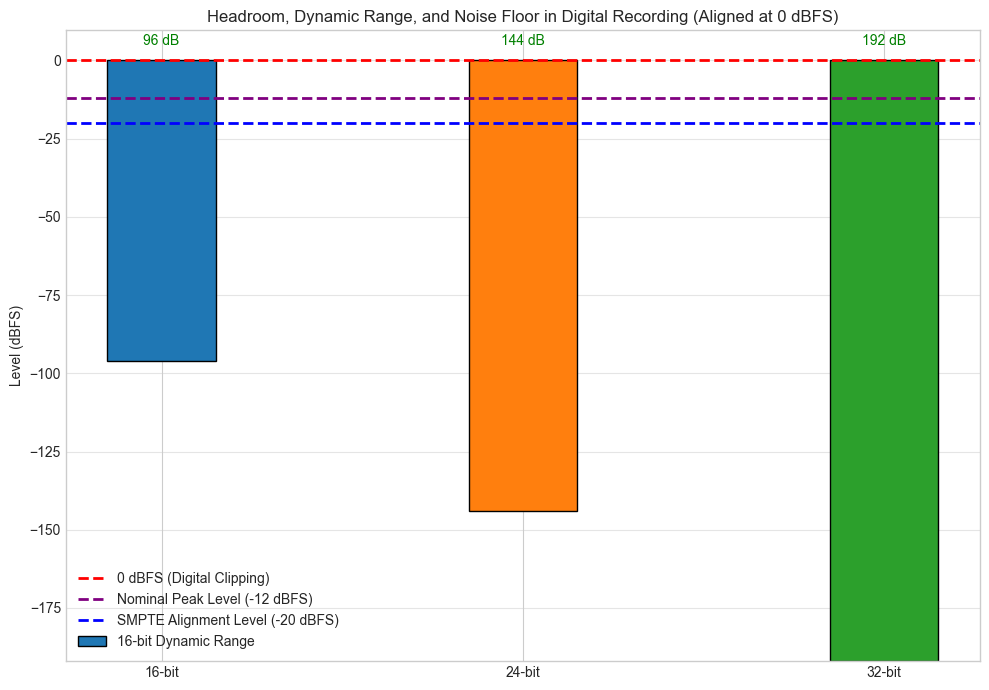

In [19]:
# Adjust the bars so their tops align with 0 dBFS (Full Scale)
plt.figure(figsize=(10, 7))

for i, b in enumerate(bit_depths):
    # Adjust bar position so top aligns with 0 dBFS
    plt.bar(i, dynamic_ranges[i], edgecolor="black", width=0.3, 
            bottom=noise_floors[i], label=f"{b}-bit Dynamic Range" if i == 0 else None)

    # Noise floor annotation
    # plt.text(i, noise_floors[i] - 5, f"{noise_floors[i]} dB", ha="center", color="orange")
    # Dynamic range annotation
    plt.text(i, 0 + 5, f"{dynamic_ranges[i]} dB", ha="center", color="green")

# Add key horizontal lines for reference
plt.axhline(0, color="red", linestyle="--", linewidth=2, label="0 dBFS (Digital Clipping)")
plt.axhline(nominal_peak_level, color="purple", linestyle="--", linewidth=2, label="Nominal Peak Level (-12 dBFS)")
plt.axhline(alignment_level, color="blue", linestyle="--", linewidth=2, label="SMPTE Alignment Level (-20 dBFS)")

# Label axes and title
plt.xticks(range(len(bit_depths)), [f"{b}-bit" for b in bit_depths])
plt.ylabel("Level (dBFS)")
plt.title("Headroom, Dynamic Range, and Noise Floor in Digital Recording (Aligned at 0 dBFS)")
plt.legend(loc="lower left")
plt.grid(axis="y", alpha=0.5)

# Show the plot
plt.tight_layout()
plt.show()